## QQ plots

In [15]:
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

Quantile-quantile plots are used to visually test the normality assumption of the error terms
which we use to obtain a closed-form/known copula (=Gaussian copula bc error terms are gaussian).
For this assumption to be valid we want the plotted quantiles to be on the diagonal axis.

In [21]:
# Paths
vartheta_path = '../../data/density/03082020/vartheta_final.csv'
B_zeta_path = '../../bdd100k_test_data/extracted_coefficients/11082020/B_zeta_predictions.csv'
z_path = '../../data/tfrecords/03082020/val_yaw_transformed.csv'
density_path = '../../data/density/03082020/density_dataframe_diffusion.csv'
checkpoint_path = '../../bdd100k_test_data/models/11082020/'
model_dir = '../../bdd100k_test_data/models/11082020'
true_y_path = '../../data/tfrecords/03082020/val_yaw_original.csv'
outfile = '../../data/plots/QQplots'

vartheta = np.genfromtxt(vartheta_path, delimiter=',')
B_zeta = np.genfromtxt(B_zeta_path, delimiter=',')
n = B_zeta.shape[0]
#true_z = np.genfromtxt(z_path, delimiter=',')[:n]
density = pd.read_csv(density_path)
true_y = np.genfromtxt(true_y_path, delimiter=',')[:n]

# p = number of betas
p = B_zeta.shape[1]

# read variational parameters
# from vector and transform to original values
beta_t = vartheta[0:p].reshape(p,)
Lambda_t_sq = np.diag(np.exp(vartheta[p:2*p].reshape(p,)))
tau_t = np.exp(vartheta[2*p])

In [8]:
# predictions
pred = B_zeta.dot(beta_t)

In [12]:
epsilon = true_y - pred

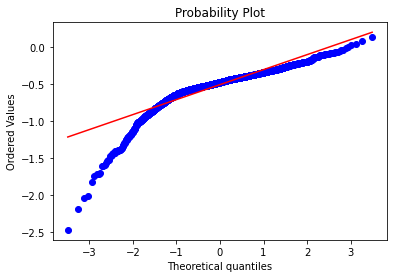

<Figure size 432x288 with 0 Axes>

In [22]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(epsilon, dist="norm", plot=plt)
#plt.titel("Residual QQ-plot")
plt.show()
plt.savefig(str(outfile + 'qq_plot_old_density.png'))